**1.1.1 Пример**
Проведем прямую y = mx + b через экспериментальные точки.

0.9999999999999999 -0.9499999999999997


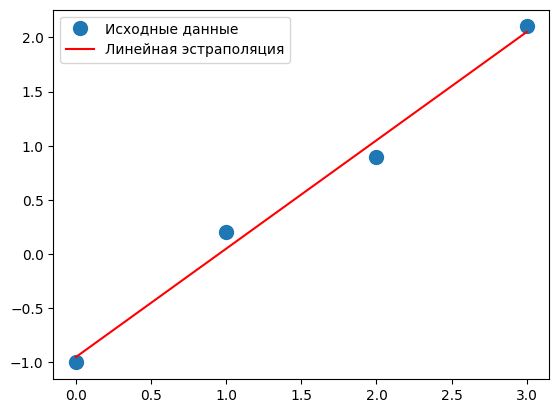

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m,c =np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная эстраполяция')
plt.legend()
plt.show()


**1.1.2 Пример**
Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома a, b, c по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

[-4.94772802 -3.52067448 -2.68284949 -1.74769651 -0.59928957 -0.34238649
  1.23430592  1.73140231  3.13103689  4.07602025  5.03068193]
[-4.94772802 -3.52067448 -2.68284949 -1.74769651 -0.59928957 -0.34238649
  1.23430592  1.73140231  3.13103689  4.07602025  5.03068193]


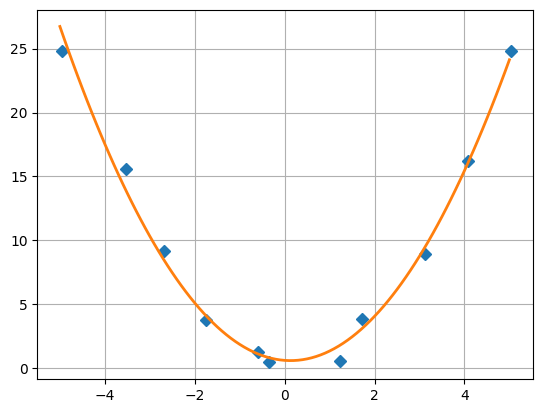

In [4]:
from numpy import *
from numpy.random import *


delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta*(rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')


x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(x)

m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec** 2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')


**1.1.3 Пример**
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

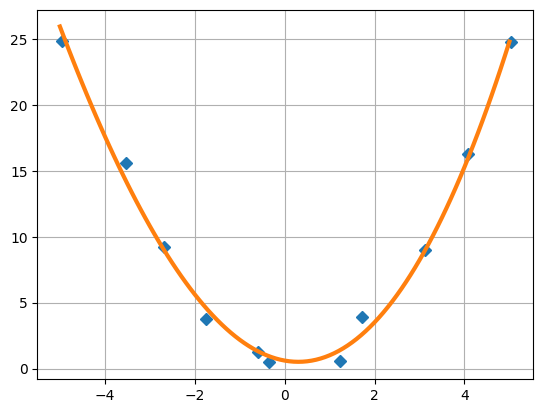

In [7]:
import numpy as np


m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')


**Задание**
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

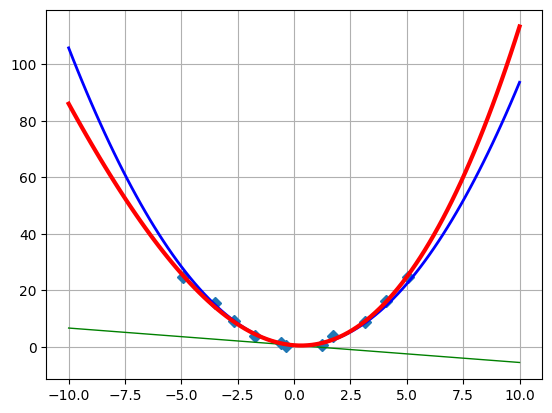

In [16]:
from numpy import *
from numpy.random import *

m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-10, 10, 101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[2] * x_prec+s[3], 'g', lw=1)
plt.plot(x_prec, s[1] * x_prec** 2 + s[2] * x_prec+s[3], 'b', lw=2)
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], 'r', lw=3)
plt.grid()


**1.1.4 Пример**
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида f(x, b) = b0 + b1exp(−b2x
2
)

0.00024553899384309864
0.1305454675227177


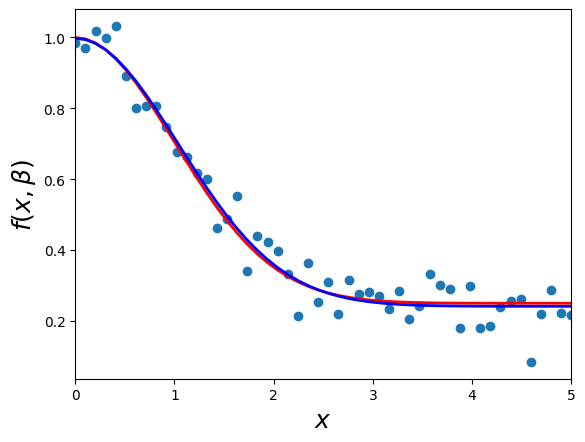

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.98576212 0.97147061 1.01880534 0.99736514 1.032651   0.89180996
 0.80080145 0.80709939 0.80562522 0.74692059 0.67622653 0.66275769
 0.6173709  0.59961732 0.4615694  0.4873666  0.5522707  0.34185901
 0.44095696 0.42428146 0.39814318 0.33157299 0.21326258 0.36438924
 0.2537849  0.31026288 0.21935806 0.31554273 0.27510763 0.2823415
 0.26911223 0.23503011 0.2833084  0.20612326 0.24269058 0.33233755
 0.30137884 0.29003553 0.18155305 0.298

In [21]:
from scipy.optimize import curve_fit
import scipy as sp

beta = (0.25, 0.75, 0.5)
def f(x: float, b0: float, b1: float, b2: float) -> float:
    return b0 + b1 * np.exp(-b2 * x ** 2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)



**1.1.5 Пример**
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
    1) f(x, b) = b0 + b1x
    2) f(x, b) = b0 + b1x + b2x^2
    3) f(x, b) = b0 + b1ln(x)
    4) f(x, b) = b0 x^b1

In [ ]:
beta = (0.25, 0.75)
def f(x: float, b0: float, b1: float) -> float:
    return b0 + b1 * x